![example](images/director_shot.jpeg)

# Microsoft Studios Analysis

**Authors:** <a href = "drabb138@gmail.com">Dalton Rabb</a>
***

## Overview

This project analysis aims to highlight some of the key decisions Microsoft Studio's newly appointed head of movie production will have to make entering the competitive industry. From multiple data sets this analysis addresses three high-level production/release choices to consider in aims to start Microsoft Studios off with a box office success. 

## Business Problem

In order to get the proper funds necessary for success in the movie industry, Microsoft Studio decision makers will need to feel confidently informed on what makes a movie successful, and the biggest question -- how much money they will have to spend. I aim to answer how to get the best return on investment from production budget, genre selection, and most profitable release months. 

## Data Understanding

For my analysis, I used multiple datasets from IMBD and The Numbers that included ratings based off of popularity(in number of votes), genre category, release month, and return on investment from production budgets.  

***

In [44]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [46]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [47]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [48]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation

To make the columns cost and revenue values easier to work with, I change the dollars to numbers and the types integers and floats for size restraints. 
***

### Cleaning Data

In [49]:
#Removed the commas and dollar signs in the columns that will be divided.
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(',', '')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('$', '')
budgets['production_budget'] = budgets['production_budget'].str.replace(',', '')
budgets['production_budget'] = budgets['production_budget'].str.replace('$', '')

In [50]:
#Changed the 'type' of numbers that fit pandas restraints for columns that will be divided. 
budgets['production_budget'] = budgets['production_budget'].astype(int)
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(float)

In [51]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1.316722e+09


Next I create a new column to that divides worldwide gross by the production budget to get the return on investment. 

In [52]:
#I multiply the roi by 100 and round to two decimal places. 
budgets['roi'] = ((budgets['worldwide_gross'] / budgets['production_budget']) *100).round(2)
#Next I changed the roi to a string so a percentage sign can easily be added to it. 
budgets['roi'] = budgets['roi'].astype(str) + '%'

In [53]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2.776345e+09,653.26%
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1.045664e+09,254.67%
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",1.497624e+08,42.79%
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1.403014e+09,424.38%
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1.316722e+09,415.37%


In order to group release dates by month, I had to create a new column solely for the release month to later analyze which months are most successful on average to release a film.

In [54]:
#Pull the month of release date
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
#Cretae new columns for the month a movie was released in.
budgets['month'] = budgets['release_date'].dt.month

### Merging Data Sets

In order to see a movie's relative rating and number of votes, I merged the "basics" and "ratings" data frames.

In [55]:
#The two data frames are merged by their tconst id value to pair average rating and numvotes with their corresponding movies. 
genre_ratings_df = pd.merge(basics,
                            ratings,
                            on = ['tconst'],
                           how = 'left')

In [56]:
genre_ratings_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


Next, I needed to separate the genres to get a better overview on how broad genres effect the number of votes and average rating.

In [57]:
genre_ratings_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [58]:
#Split each string in genres category for every comma.
genre_ratings_df['genres'] = genre_ratings_df['genres'].str.split(',')

In [59]:
genre_ratings_df['genres'].head()

0      [Action, Crime, Drama]
1          [Biography, Drama]
2                     [Drama]
3             [Comedy, Drama]
4    [Comedy, Drama, Fantasy]
Name: genres, dtype: object

In [60]:
#Create new row with .explode for each genre per movie. 
genre_explode = genre_ratings_df.explode('genres')

In [61]:
genre_explode.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77.0
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77.0
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43.0


## Data Modeling and Evaluation


### Release Month
The month of a release can have a big impact on the success of a movie. Historically, many studios release their biggest movies during the Summer or Holiday months when more people are going to the box office. To advise a handful of release months, I looked at the average worldwide gross by release month. 

In [62]:
#Get average worldwide gross per release month and round
budgets.groupby('month')['worldwide_gross'].mean().round()

month
1      46563824.0
2      71544526.0
3      80633371.0
4      59920259.0
5     162268004.0
6     142523031.0
7     140963615.0
8      60978411.0
9      46693687.0
10     49464562.0
11    135741627.0
12    101693171.0
Name: worldwide_gross, dtype: float64

### Genre Selection

One of the most influential factors in a movie's success is that movie's genre. In order to advise what movies Microsoft studios should create, I looked at the most popular genres (rated by number of votes).

In [63]:
#Get mean number of votes per genre in descending order. 
genre_explode.groupby('genres')['numvotes'].mean().sort_values(ascending = False)

genres
Adventure      22067.746660
Sci-Fi         19474.292384
Action         14476.485690
Fantasy        12387.443086
Animation       8808.549627
Western         8758.485714
Crime           8594.959011
Mystery         8113.618295
Thriller        5860.449434
Biography       5673.259648
Comedy          4297.617409
Romance         4084.667324
Drama           3883.574769
Sport           3185.601357
War             3147.391559
Horror          3112.417905
History         2776.406726
Music           2771.020833
Family          2531.274912
Musical         1925.055479
Game-Show       1734.500000
Documentary      266.960232
News             212.986183
Adult             54.666667
Reality-TV        27.000000
Short              8.000000
Talk-Show               NaN
Name: numvotes, dtype: float64

The top four genres, adventure, sci-fi, action, and fantasy  have a considerably higher average number of votes, which is how popularity is determined in my analysis. I recommend Microsoft studios makes their first movies in these categories, or a combination of the top four. 

### Production Budget

Before assuming the obvious, I wanted to let the data show there is a strong positive correlation between a movie's production budget and worldwide gross revenue which is calculated below at .748306.

In [64]:
budgets[['worldwide_gross', 'production_budget']].corr()

,worldwide_gross,production_budget
worldwide_gross,1.000000,0.748306
production_budget,0.748306,1.000000


Now that I have confirmed worldwide gross and production budget have a strong positive correlation, I begin calculating the average production budget for movies in the top 10% of worldwide gross. 

In [65]:
#View top 10% of movies based on worldwide gross
budgets[budgets['worldwide_gross'] >= budgets['worldwide_gross'].quantile(.9)] 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,month
0,1,2009-12-18,Avatar,425000000,"$760,507,625",2.776345e+09,653.26%,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1.045664e+09,254.67%,5
3,4,2015-05-01,Avengers: Age of Ultron,330600000,"$459,005,868",1.403014e+09,424.38%,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1.316722e+09,415.37%,12
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2.053311e+09,671.02%,12
...,...,...,...,...,...,...,...,...
4567,68,1939-12-15,Gone with the Wind,3900000,"$198,680,470",3.905252e+08,10013.47%,12
4589,90,1997-08-13,The Full Monty,3500000,"$45,950,122",2.612494e+08,7464.27%,8
4775,76,1950-02-15,Cinderella,2900000,"$85,000,000",2.635914e+08,9089.36%,2
5346,47,1942-08-13,Bambi,858000,"$102,797,000",2.680000e+08,31235.43%,8


Finally, I got the average production budget for movies in the top 10% of worldwide gross.

In [66]:
#First create a sub dataframe of movies in the top 10% of worldwide gross.
top10p = budgets[budgets['worldwide_gross'] >= budgets['worldwide_gross'].quantile(.9)]
#Calculate the average production budget of the sub dataframe. 
top10p['production_budget'].mean().round(0)

108987231.0

The average production budget is 108,987,231 dollars for the most successful movies based off worldwide gross. To join that elite company of movies, they should expect to set the budget at or around $109 million. 

## Visualization

***

### Production Budget

Below is a scatter plot visualization for worldwide gross vs production budget in millions, showing the correlation of 0.748306 between the two. 

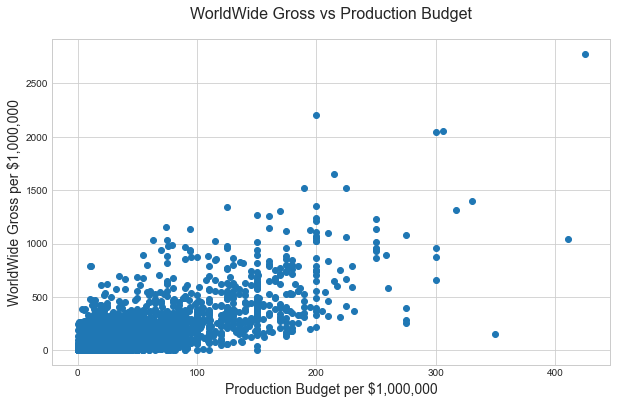

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
#Create Plot
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize = (10,6))
    #divide by 1,000,000 for better visual. 
    plt.scatter(x = (budgets['production_budget'] / 1000000), y = (budgets['worldwide_gross'] / 1000000))
    plt.title('WorldWide Gross vs Production Budget', pad = 20, fontsize = 16)
    plt.xlabel('Production Budget per $1,000,000', fontsize = 14)
    plt.ylabel('WorldWide Gross per $1,000,000', fontsize = 14)
    plt.savefig("")
    plt.show()

### Release Month

Below is a bar chart showing the highest revenue by release month. As shown, movies released in May-June, and November-December average a substantially higher revenue. 

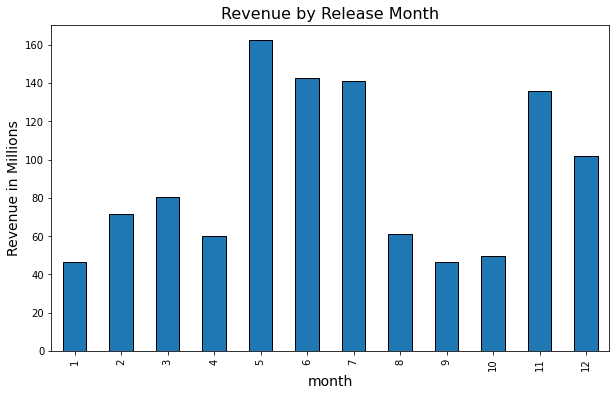

In [72]:
fig, ax = plt.subplots (figsize = (10,6))
fig.color = 'white'
months_graph = ((budgets.groupby('month')['worldwide_gross'].mean().round()) / 1000000)
ax.set_title('Revenue by Release Month', fontsize = 16)
ax.set_xlabel('Release Month', fontsize = 14)
ax.set_ylabel('Revenue in Millions', fontsize = 14)
months_graph.plot(kind = 'bar', edgecolor = 'black')
plt;

### Genre Selection

Lastly, popularity by genre is visualized below, to easily interpret how beloved action, sci-fi, and especially adventure movies are amongst movie fans.

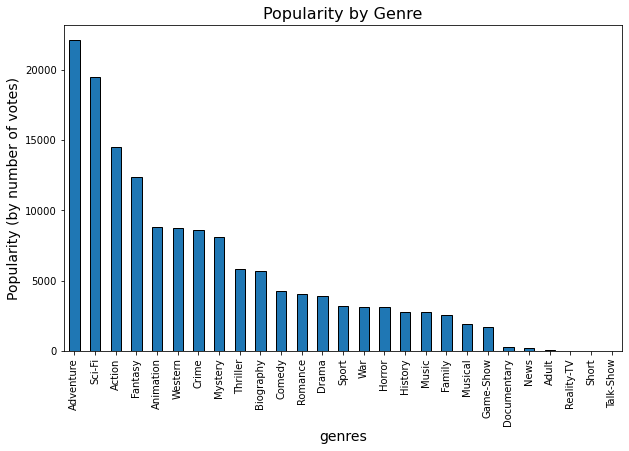

In [74]:
fig, ax = plt.subplots (figsize = (10,6))
fig.color = 'white'
genrepop_graph = genre_explode.groupby('genres')['numvotes'].mean().sort_values(ascending = False)
ax.set_title('Popularity by Genre', fontsize = 16)
ax.set_xlabel('Genres', fontsize = 14)
ax.set_ylabel('Popularity (by number of votes)', fontsize = 14)
genrepop_graph.plot(kind = 'bar', edgecolor = 'black');                                                                            

## Conclusions 

In conclusion, my analysis lead to three critical suggestions for Microsoft Studios new production. 

<li>Microsoft studios should expect to allocate around <b>109 million dollars</b> to their production budget to generate worldwide sales in the top 10% of movies.</li>

<li>The release date should be set for <b>early Summer(May-July)</b> or during holiday season (November-December), since movies released during these periods have the highest revenue on average. </li>

<li>Microsoft Studios should create a movie fitting in the <b>action, adventure, or sci-fi</b> category as they are the most popular among movie fans.</li>